<a href="https://colab.research.google.com/github/rswatsch/MAT421_RyanS/blob/main/Module_H%2C_22_4_22_5_22_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module H
**Section 22.4 22.5 22.6**

In this assignment we will discuss and learn about Numerical Error and instability and then Predictor-Corrector Methods for solving ODE's



**Section 22.4, Numerical Error and Instability**

Numerical integrations comes with a price and that is numerical error of integration. This can become quite an issue if not noticed in the first place as it grows with integration. If we remember the first order ODE from the last assignment about the pendulum it becomes more obvious what is occuring.

<ipython-input-30-af771e168dc4>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


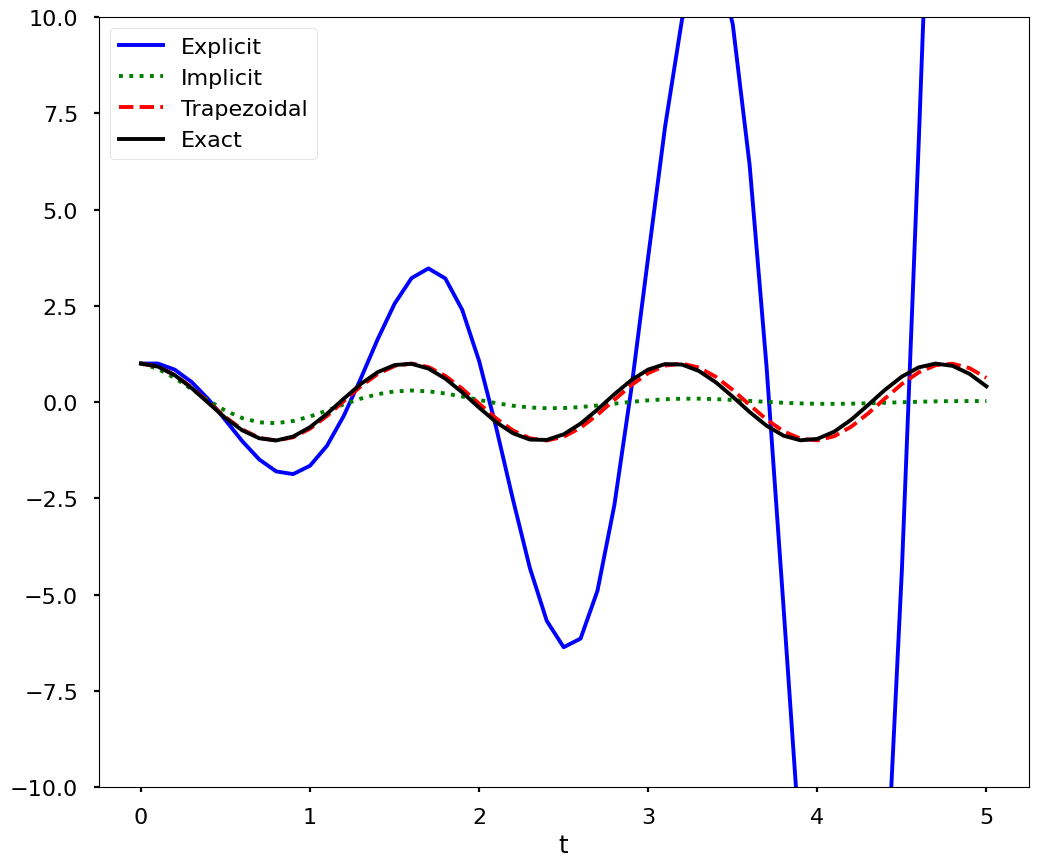

In [30]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline


h = 0.1

t = np.arange(0, 5.1, h)

w = 4
s0 = np.array([[1], [0]])

m_e = np.array([[1, h],
               [-w**2*h, 1]])
m_i = inv(np.array([[1, -h],
               [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2],
    [w**2*h/2,1]])), np.array(
      [[1,h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))


s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])

plt.figure(figsize = (12, 10))
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-10, 10])
plt.xlabel('t')
plt.ylabel('')
plt.legend(['Explicit', 'Implicit','Trapezoidal', 'Exact'])
plt.show()

As you can see from above there is quite a range here in terms of approximations compared to the real solution the most accurate approximation being the trapezoid rule.

***Some Important things to remember***

Accuracy - refers to how close to the exact solution as a function of step size h

Stability - refers to the ability to keep the error from growing as you continue to integrate. If error stops growing stability is found and if it continue well it is unstable.

**Section 22.5, Predictor-Corrector and Runge Kutta Methods**

The predictor-corrector methods of solving IVP (Initial Value Problems) requires an accuracy approximation of non-predictor-corrector methods by querying a function F at different times and different locations. Then we can weight the average of the results, the correction portion, to update the method.



One example of this is the Runge Kutta method. Another commonly used ODE solving method is the Euler method.

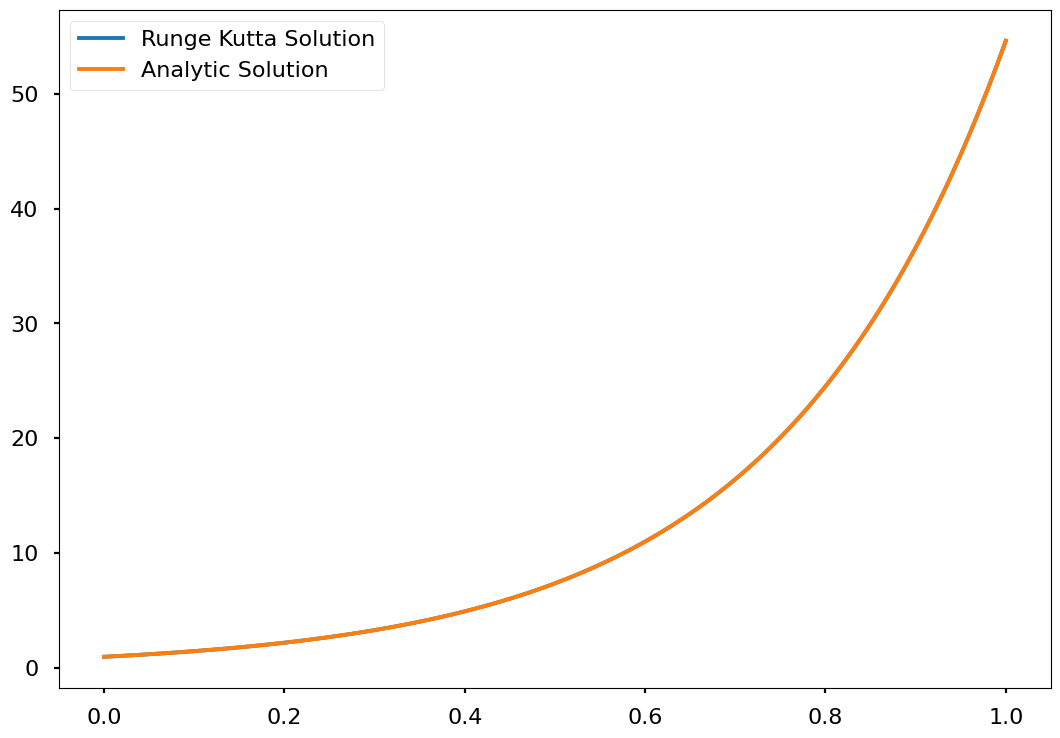

In [23]:
def rk4(f,h,x0,y0,n):

    x=x0
    y=y0
    t=np.zeros(n+1)
    t[0]=x0
    F=np.zeros(n+1)
    F[0]=y0
    for i in range(n):
        k1 = h * (f(x      , y))
        k2 = h * (f((x+h/2), (y+k1/2)))
        k3 = h * (f((x+h/2), (y+k2/2)))
        k4 = h * (f((x+h)  , (y+k3)))
        k = (k1+2*k2+2*k3+k4)/6
        y = y + k
        F[i+1]=y
        x = x + h
        t[i+1]=x
    return t,F

def velocity(t,x):
  return  4*x

t,F=rk4(velocity, .01,0,1,100)
plt.plot(t,F,label='Runge Kutta Solution')
plt.plot(t,np.exp(4*t),label='Analytic Solution')
plt.legend()

**Section 22.6, Python ODE Solvers**

Python conveniently has built in methods to solving ODE's, below is an example of that exact built in method.

This example is of cox(t) where our initial value is S(not) = 0 and the exact solution is sin(t). Using solve_ivp to approximate our solution over a set interval. We can then calculate the error and plot and compare to our exact soluition.

<ipython-input-22-fe25ee2ca8f3>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


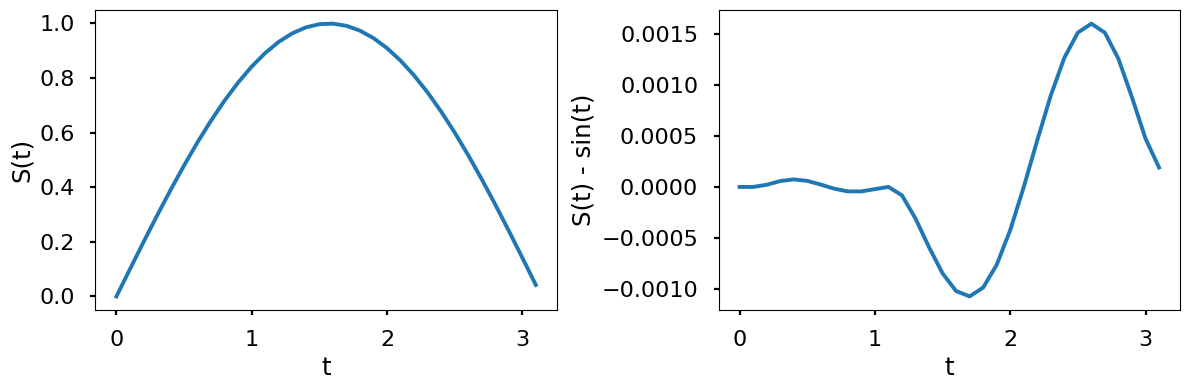

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

plt.style.use('seaborn-poster')

%matplotlib inline

F = lambda t, s: np.cos(t)

t_eval = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()